# Bombing Operations during the Vietnam War

## Introduction
### History
The Vietnam War was one of the costliest and most divisive conflicts the US has been involved in, to date. While no formal declaration of war was issued, American advisors had been involved in the Indochina region since the French occupation post-World War II. Formal US involvement began in earnest in 1964, after the [Gulf of Tonkin incident](https://en.wikipedia.org/wiki/Gulf_of_Tonkin_incident).  

The US and its allies relied heavily on air superiority to carry out offensive operations. The US also conducted large-scale strategic bombing campaigns in North Vietnam, some of the largest since the end of the Second World War. In the end, however, US involvement was not enough to prop up the South Vietnamese government and armed forces. As a result of the [Tet Offensive](https://en.wikipedia.org/wiki/Tet_Offensive), which showed the clear inabilitiy of the [ARVN](https://en.wikipedia.org/wiki/Army_of_the_Republic_of_Vietnam) to resist [NVA](https://en.wikipedia.org/wiki/People%27s_Army_of_Vietnam) forces, the US began to implement ["Vietnamization"](https://en.wikipedia.org/wiki/Vietnamization). Two years after the withdraw of US forces in August 1973, Saigon fell to the NVA, and North and South Vietnam were reunited the following year (1976).  

### U.S. Air Force Doctrine
USAF doctrine during this period focused heavily on close-air support and massive strategic bombing campaigns. Because of the notoriously thick jungle environment of Vietnam, close-air support aircraft began carrying napalm. As well, missions using Agent Orange were flown to defoliate the jungle, to try and increase the effectiveness of air support assets.  

Strategic bombing was a mainstay of the USAF bomber doctrine, ever since the end of the Second World War. However, because of fears of drawing China into the conflict, targets were heavily limited by the Johnson and Nixon administrations. As a result, the effectiveness of these strategic bombing campaigns were limited. When they were effectively employed, heavy bombers, such as the B-52, mainly targetted large factory complexes, in an attempt to degrade the North Vietnamese supply line and warfighting capabilities.  

Because of the general inaccuracy of carpet bombing, and the increased visibility of civilian casualties, more precise weapon systems were developed. These would heavily influence Air Force doctrine for the years to come.

## Loading the Data

In [14]:
import zipfile
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
start = time.time()
z = zipfile.ZipFile('vietnam-war-bombing-operations.zip')
aircrafts = pd.read_csv(z.open('THOR_Vietnam_Aircraft_Glossary.csv'), encoding = 'ISO-8859-1')
weapons = pd.read_csv(z.open('THOR_Vietnam_Weapons_Glossary.csv'),encoding = 'ISO-8859-1')
bombing_ops = pd.read_csv(z.open('THOR_Vietnam_Bombing_Operations.csv'))
end = time.time()
print(f'3 files loaded in {end - start} seconds')

3 files loaded in 86.91760087013245 seconds


In [19]:
print('------DATASET SHAPES------')
print('BOMBING OPS:', bombing_ops.shape)
print('AIRCRAFT:', aircrafts.shape)
print('WEAPONS:', weapons.shape)

------DATASET SHAPES------
BOMBING OPS: (4670416, 47)
AIRCRAFT: (104, 8)
WEAPONS: (294, 6)


In [23]:
bombing_ops.head(3)

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0


In [26]:
bombing_ops.columns

Index(['THOR_DATA_VIET_ID', 'COUNTRYFLYINGMISSION', 'MILSERVICE', 'MSNDATE',
       'SOURCEID', 'SOURCERECORD', 'VALID_AIRCRAFT_ROOT', 'TAKEOFFLOCATION',
       'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84', 'TGTTYPE',
       'NUMWEAPONSDELIVERED', 'TIMEONTARGET', 'WEAPONTYPE', 'WEAPONTYPECLASS',
       'WEAPONTYPEWEIGHT', 'AIRCRAFT_ORIGINAL', 'AIRCRAFT_ROOT',
       'AIRFORCEGROUP', 'AIRFORCESQDN', 'CALLSIGN', 'FLTHOURS', 'MFUNC',
       'MFUNC_DESC', 'MISSIONID', 'NUMOFACFT', 'OPERATIONSUPPORTED',
       'PERIODOFDAY', 'UNIT', 'TGTCLOUDCOVER', 'TGTCONTROL', 'TGTCOUNTRY',
       'TGTID', 'TGTORIGCOORDS', 'TGTORIGCOORDSFORMAT', 'TGTWEATHER',
       'ADDITIONALINFO', 'GEOZONE', 'ID', 'MFUNC_DESC_CLASS',
       'NUMWEAPONSJETTISONED', 'NUMWEAPONSRETURNED', 'RELEASEALTITUDE',
       'RELEASEFLTSPEED', 'RESULTSBDA', 'TIMEOFFTARGET',
       'WEAPONSLOADEDWEIGHT'],
      dtype='object')

In [24]:
aircrafts.head(3)

,GLOSS_ID,VALIDATED_ROOT,AIRCRAFT_NAME,WEBSITE_LINK,AIRCRAFT_TYPE,AIRCRAFT_SHORTNAME,AIRCRAFT_APPLICATION,AC_MISSION_COUNT
0,1,A-1,Douglas A-1 Skyraider,http://www.navalaviationmuseum.org/attractions...,Fighter Jet,Skyraider,FIGHTER,373265
1,2,A-26,Douglas A-26 Invader,http://www.militaryfactory.com/aircraft/detail...,Light Bomber,Invader,BOMBER,36672
2,4,A-37,Cessna A-37 Dragonfly,http://www.militaryfactory.com/aircraft/detail...,Light ground-attack aircraft,Dragonfly,ATTACK,282699


In [27]:
aircrafts.columns

Index(['GLOSS_ID', 'VALIDATED_ROOT', 'AIRCRAFT_NAME', 'WEBSITE_LINK',
       'AIRCRAFT_TYPE', 'AIRCRAFT_SHORTNAME', 'AIRCRAFT_APPLICATION',
       'AC_MISSION_COUNT'],
      dtype='object')

In [25]:
weapons.head(3)

,WEAPON_ID,WEAPONTYPE,WEAPONTYPE_COMMON_NAME,WEAPON_CLASS,WEAPONTYPE_DESC,WEAPON_COUNT
0,1,100 GP,General Purpose Bomb,BOMB,100 lb general purpose,1
1,2,1000 G,Megaboller flash powder bomb,BOMB,1000 g BKS,2
2,3,1000LB GP M-65,An-M65,BOMB,1000 lb general purpose,12776


In [28]:
weapons.columns

Index(['WEAPON_ID', 'WEAPONTYPE', 'WEAPONTYPE_COMMON_NAME', 'WEAPON_CLASS',
       'WEAPONTYPE_DESC', 'WEAPON_COUNT'],
      dtype='object')

## Data Analysis and Visualization  
### Which country flew the most combat missions?

Text(0.5, 1.0, 'Missions flown by Country')

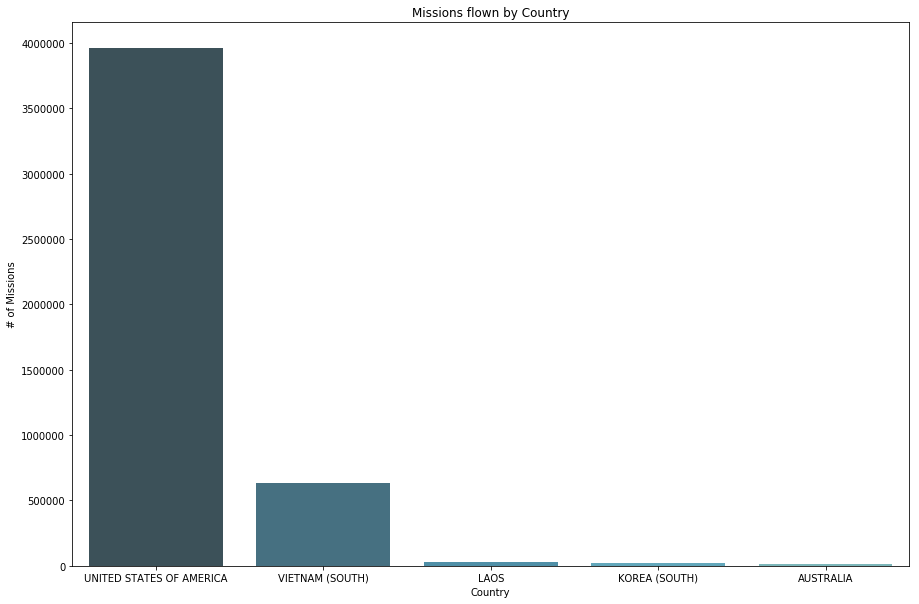

In [62]:
country_missions = bombing_ops.COUNTRYFLYINGMISSION
country_counts = country_missions.value_counts()
x, y = country_counts.keys().tolist(), country_counts.values

plt.figure(figsize = (15,10))
sns.barplot(x = x, y = y, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Country')
plt.ylabel('# of Missions')
plt.title('Missions flown by Country')

As to be expected, the United States flew the most missions. South Vietnam came in second, which makes sense, given the resources and equipment the US provided for ARVN.

### Which branch flew the most missions for the United States?

Text(0.5, 1.0, 'Missions Flown by Service Branch')

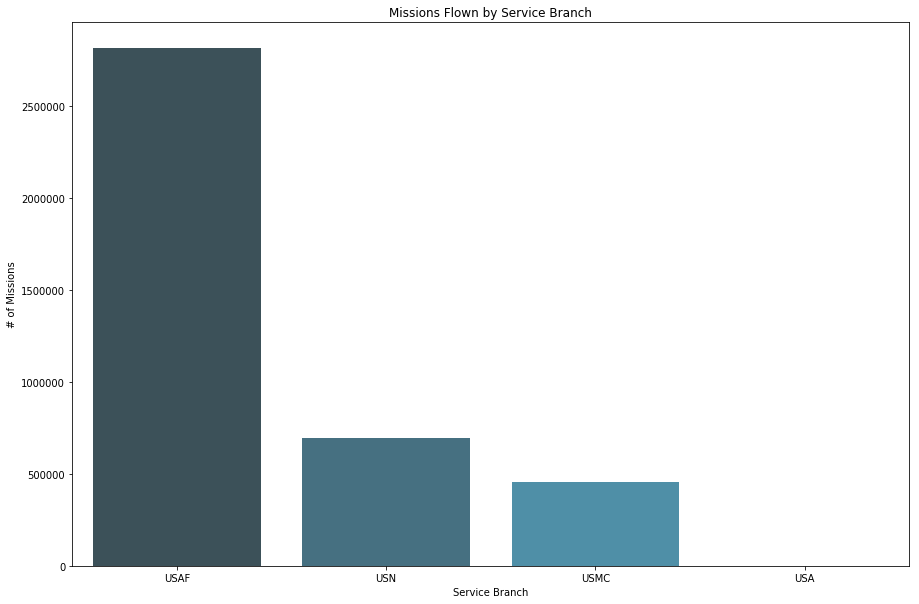

In [63]:
branches = bombing_ops[bombing_ops.COUNTRYFLYINGMISSION == 'UNITED STATES OF AMERICA'].MILSERVICE
branch_counts = branches.value_counts()
x, y = branch_counts.keys().tolist(), branch_counts.values

plt.figure(figsize = (15,10))
sns.barplot(x = x, y = y, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Service Branch')
plt.ylabel('# of Missions')
plt.title('Missions Flown by Service Branch')